In [1]:
#Task1
import pandas as pd
df = pd.read_csv('coursework_1_data_2019.csv')
#Data size
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 152 x 28


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female     152 non-null    in

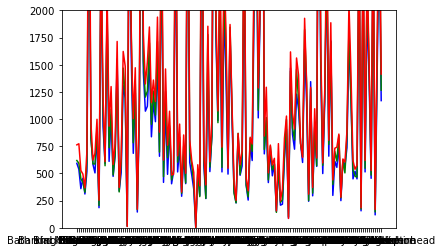

In [13]:
import matplotlib.pyplot as plt
plt.plot(df['local_authority_area'],df['2008_cases_total'],color='blue')
plt.plot(df['local_authority_area'],df['2013_cases_total'],color='green')
plt.plot(df['local_authority_area'],df['2018_cases_total'],color='red')
plt.ylim(0,2000)
plt.show()

In [18]:
#Places where were reported less cases of childhood obessity
df[df['2018_cases_total']<=df['2008_cases_total']]['local_authority_area']

25             City of London
48     Hammersmith and Fulham
59            Isles of Scilly
91                 Nottingham
105                   Rutland
116               Southampton
Name: local_authority_area, dtype: object

In [24]:
#Percentaje childhood obesity cases per hundred citizens %
#Childhood obesity cases/ hundred population 
ratio_child_cit=['ratio_child_cit_2008','ratio_child_cit_2013','ratio_child_cit_2018']
df_var_rate=df.iloc[:,0:1]
for b in ratio_child_cit:
    df_var_rate[b]=df[f"{b[-4:]}_cases_total"]/df[f"{b[-4:]}_pop_total"]*100
    print(f"Percentaje of obese child per citizen in {b[-4:]}")

Percentaje of obese child per citizen in 2008
Percentaje of obese child per citizen in 2013
Percentaje of obese child per citizen in 2018


In [40]:
df_var_rate.head()

,local_authority_area,ratio_child_cit_2008,ratio_child_cit_2013,ratio_child_cit_2018,var_rate
0,Barking and Dagenham,0.343402,0.345752,0.419740,0.076339
1,Barnet,0.158327,0.172643,0.217162,0.058835
2,Barnsley,0.158762,0.184828,0.204356,0.045595
3,Bath and North East Somerset,0.255283,0.243388,0.260915,0.005631
4,Bedford,0.196605,0.198414,0.215296,0.018691


In [42]:
df_var_rate['var_rate']=df_var_rate['ratio_child_cit_2018']-df_var_rate['ratio_child_cit_2008']


In [28]:
#Places where were reported less rates of childhood obessity
df[df_var_rate['ratio_child_cit_2013']<=df_var_rate['ratio_child_cit_2008']]['local_authority_area']

3      Bath and North East Somerset
8                         Blackpool
10                      Bournemouth
14                Brighton and Hove
18                             Bury
19                       Calderdale
20                   Cambridgeshire
33                            Devon
42                            Essex
54                    Herefordshire
59                  Isles of Scilly
73                     Lincolnshire
77                           Medway
80                    Milton Keynes
84          North East Lincolnshire
92                  Nottinghamshire
95                     Peterborough
116                     Southampton
119                       St Helens
123                  Stoke on Trent
124                         Suffolk
132                          Torbay
136                         Walsall
142                     West Sussex
145                       Wiltshire
Name: local_authority_area, dtype: object

In [32]:
list(df.columns.values)

['local_authority_area',
 '2008_cases_total',
 '2013_cases_total',
 '2018_cases_total',
 '2008_pop_total',
 '2013_pop_total',
 '2018_pop_total',
 '2008_cases_male',
 '2013_cases_male',
 '2018_cases_male',
 '2008_pop_male',
 '2013_pop_male',
 '2018_pop_male',
 '2008_cases_female',
 '2013_cases_female',
 '2018_cases_female',
 '2008_pop_female',
 '2013_pop_female',
 '2018_pop_female',
 'total_budget',
 'clean_air',
 'clean_environ',
 'health_training',
 'school_awareness',
 'media_awareness',
 'sub_counselling',
 'region',
 'local_authority_type']

In [47]:
#Dataframe de tasas de aumento de obesidad seg'un inversion--> Analisis 1
df_a1=pd.concat([df_var_rate.iloc[:,0],df_var_rate.iloc[:,4],df.iloc[:,19:26]],axis=1)


In [48]:
df_a1.head()

,local_authority_area,var_rate,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
0,Barking and Dagenham,0.076339,139000,21000,22000,18000,41000,18000,19000
1,Barnet,0.058835,220000,50000,17000,23000,74000,30000,26000
2,Barnsley,0.045595,160000,41000,45000,5000,26000,29000,14000
3,Bath and North East Somerset,0.005631,161000,33000,42000,19000,50000,10000,7000
4,Bedford,0.018691,130000,37000,52000,17000,8000,3000,13000


<AxesSubplot:xlabel='var_rate', ylabel='health_training'>

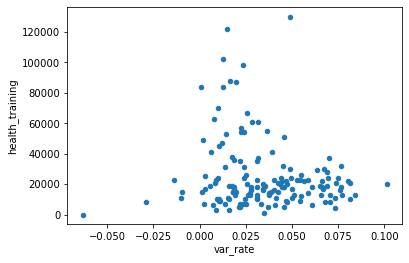

In [53]:
df_a1.plot(x='var_rate',y='health_training',kind='scatter')